<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_00_ProjZero_LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import (make_pipeline, Pipeline)
import matplotlib.pyplot as plt
import sys

print(sys.version)
print(np.__version__)

3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
1.23.5


In [ ]:
np.random.seed(0)
sigma = 0.35
n = 50
degrees = 20
noise = sigma * np.random.randn(n).reshape(-1,1)

x_train = np.sort(np.random.rand(n)).reshape(-1,1)
y_train = np.sin(2.5 * np.pi * x_train) + noise
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

obj_poly = preprocessing.PolynomialFeatures(degree = degrees, include_bias = False)
xp_train = obj_poly.fit_transform(x_train)
print("x_poly_train shape:", xp_train.shape)

x_test = np.sort(np.random.rand(n)).reshape(-1,1)
y_test = np.sin(2.5 * np.pi * x_test) + noise
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

xp_test = obj_poly.fit_transform(x_test)
print("x_poly_test shape:", xp_test.shape)

x_train shape: (50, 1) y_train shape: (50, 1)
x_poly_train shape: (50, 20)
x_test shape: (50, 1) y_test shape: (50, 1)
x_poly_test shape: (50, 20)


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(xp_train, y_train)
yp_train = reg.predict(xp_train)
yp_test = reg.predict(xp_test)
print("Linear MSE (train):", metrics.mean_squared_error(y_train, yp_train))
print("Linear MSE (test):", metrics.mean_squared_error(y_test, yp_test))

Linear MSE (train): 0.09123449921080073
Linear MSE (test): 119.00736169846604


Text(0, 0.5, 'mse')

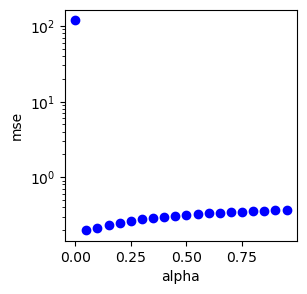

In [ ]:
alphas = np.arange(0, 1, 0.05)
rig_mse = []
for alpha in alphas:
    rig = linear_model.Ridge(alpha = alpha, solver = 'svd')
    rig.fit(xp_train, y_train)
    yp_test_rig = rig.predict(xp_test)
    rig_mse.append((alpha, metrics.mean_squared_error(y_test, yp_test_rig)))
plt.figure(figsize=(3,3))
for alpha, mse in rig_mse:
    plt.scatter(alpha, mse, c = 'b')
plt.yscale('log')
plt.xlabel("alpha")
plt.ylabel("mse")

In [ ]:
alpha = 0.05
rig = linear_model.Ridge(alpha = alpha, solver = 'svd')
rig.fit(xp_train, y_train)
yp_train_rig = reg.predict(xp_train)
yp_test_rig = rig.predict(xp_test)

print("Ridge MSE [alpha = 0.05] (train):", metrics.mean_squared_error(y_train, yp_train_rig))
print("Ridge MSE [alpha = 0.05] (test):", metrics.mean_squared_error(y_test, yp_test_rig))

Ridge MSE [alpha = 0.05] (train): 0.09123449921080073
Ridge MSE [alpha = 0.05] (test): 0.1985338898048508


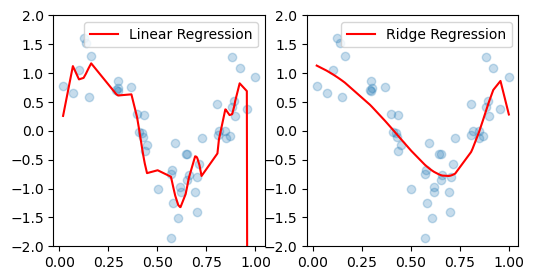

In [ ]:
plt.figure(figsize=(6,3))
r, c = 1, 2
plt.subplot(r, c, 1)
plt.scatter(x_test, y_test, alpha = 0.25)
plt.plot(x_test, yp_test, c = 'r', label = "Linear Regression")
plt.ylim(-2,2)
plt.legend()
plt.subplot(r, c, 2)
plt.scatter(x_test, y_test, alpha = 0.25)
plt.plot(x_test, yp_test_rig, c = 'r', label = "Ridge Regression")
plt.ylim(-2,2)
plt.legend()

In [ ]:
dataset_diabetes = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(dataset_diabetes["data"], dataset_diabetes["target"])

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (331, 10) y_train shape: (331,)
x_test shape: (111, 10) y_test shape: (111,)


Text(0, 0.5, 'mse')

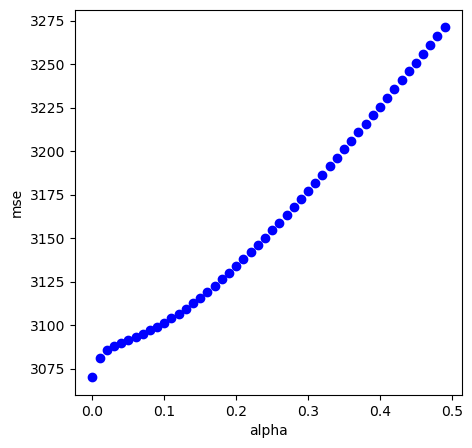

In [ ]:
alphas = np.arange(0, 0.5, 0.01)
rig_mse = []
for alpha in alphas:
    rig = linear_model.Ridge(alpha = alpha, solver = 'auto')
    rig.fit(x_train, y_train)
    yp_test_rig = rig.predict(x_test)
    rig_mse.append((alpha, metrics.mean_squared_error(y_test, yp_test_rig)))

plt.figure(figsize=(5,5))
for alpha, mse in rig_mse:
    plt.scatter(alpha, mse, c = 'b')
plt.xlabel("alpha")
plt.ylabel("mse")

In [ ]:
rig_cv = linear_model.RidgeCV(alphas = (0.001, 0.01, 0.05, 0.10, 1.0), cv = 10)
rig_cv.fit(x_train, y_train)
yp_test_rig_cv = rig_cv.predict(x_test)
print("Ridge CV MSE (test):", metrics.mean_squared_error(y_test, yp_test_rig_cv))
print(rig_cv.alpha_)

Ridge CV MSE (test): 3101.4520725771367
0.1


In [ ]:
rig_cv = linear_model.RidgeCV(alphas = (0.07, 0.08, 0.09, 0.10, 0.11, 0.12), cv = 10)
rig_cv.fit(x_train, y_train)
yp_test_rig_cv = rig_cv.predict(x_test)
print("Ridge CV MSE (test):", metrics.mean_squared_error(y_test, yp_test_rig_cv))
print(rig_cv.alpha_)

Ridge CV MSE (test): 3096.9695816760673
0.08


In [ ]:
dataset_cancer = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(dataset_cancer.data, dataset_cancer.target)
print("x_train shape:", x_train.shape, "\nx_test shape:", x_test.shape)
print("y_train shape:", y_train.shape, "\ny_test shape:",  y_test.shape)

x_train shape: (426, 30) 
x_test shape: (143, 30)
y_train shape: (426,) 
y_test shape: (143,)


alpha: 0.1
score:  0.9790209790209791


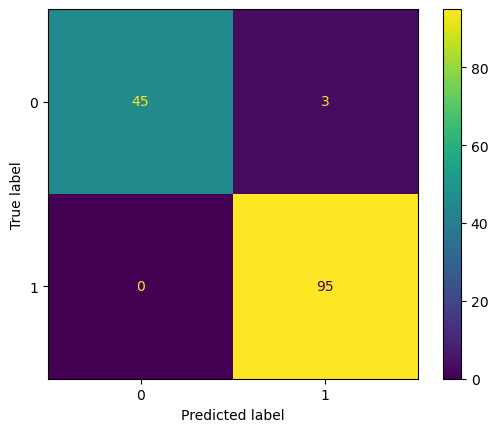

In [ ]:
rig_clf = linear_model.RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), cv = 10)
rig_clf.fit(x_train, y_train)
yp_test_clf = rig_clf.predict(x_test)
print("alpha:", rig_clf.alpha_)
print("score: ", rig_clf.score(x_test, y_test))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = rig_clf.classes_)
disp.plot()

alpha: 0.1
score:  0.9790209790209791


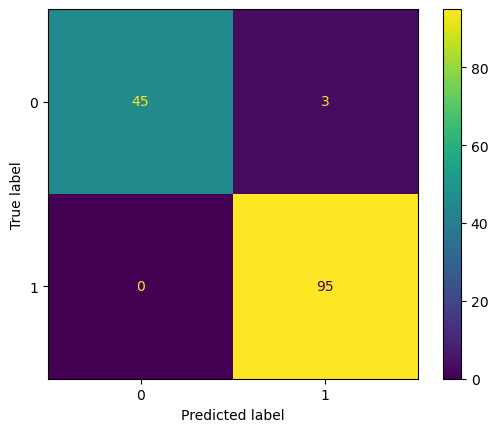

In [ ]:
rig_clf = linear_model.RidgeClassifierCV(alphas=(0.05, 0.75, 0.1, 0.125, 0.15), cv = 10)
rig_clf.fit(x_train, y_train)
yp_test_clf = rig_clf.predict(x_test)
print("alpha:", rig_clf.alpha_)
print("score: ", rig_clf.score(x_test, y_test))
conf_mat = metrics.confusion_matrix(y_test, yp_test_clf, labels=rig_clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = rig_clf.classes_)
disp.plot()

In [ ]:
datasets_housing = datasets.fetch_california_housing()
x_train, x_test, y_train, y_test = train_test_split(dataset_diabetes["data"], dataset_diabetes["target"])

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (331, 10) y_train shape: (331,)
x_test shape: (111, 10) y_test shape: (111,)


Lasso sore: 0.5315060889612533


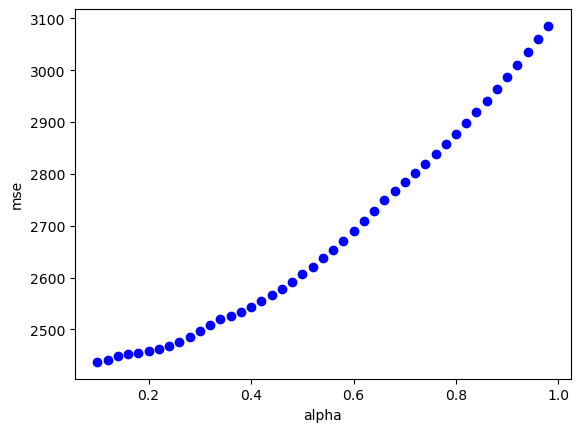

In [ ]:
alphas = np.arange(0.1 ,1., 0.02)
lasso_mse = []
for alpha in alphas:
    lasso = linear_model.Lasso(alpha = alpha)
    lasso.fit(x_train, y_train)
    yp_test_lasso = lasso.predict(x_test)
    lasso_mse.append((alpha, metrics.mean_squared_error(y_test, yp_test_lasso)))

for alpha, mse in lasso_mse:
    plt.scatter(alpha, mse, c = 'b')
plt.xlabel("alpha")
plt.ylabel("mse")

alpha = min(lasso_mse, key = lambda x: x[1])[0]
lasso = linear_model.Lasso(alpha = alpha)
lasso.fit(x_train, y_train)
yp_test_lasso = lasso.predict(x_test)
print("Lasso sore:", lasso.score(x_test, y_test))

In [ ]:
lasso_cv = linear_model.LassoCV(cv = 10)
lasso_cv.fit(x_train, y_train)
yp_test_lasso_cv = lasso_cv.predict(x_test)
print("alpha:", lasso_cv.alpha_)
print("Lasso CV sore:", lasso_cv.score(x_test, y_test))

alpha: 0.06060963280692753
Lasso CV sore: 0.5316224685990775


In [ ]:
datasets_housing = datasets.fetch_california_housing()
x_train, x_test, y_train, y_test = train_test_split(dataset_diabetes["data"], dataset_diabetes["target"])

y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

y_train = np.concatenate([y_train, y_train**2, y_train**3], axis = 1)
y_test = np.concatenate([y_test, y_test**2, y_test**3], axis = 1)

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

multi_lasso = linear_model.MultiTaskLassoCV(cv = 10)
multi_lasso.fit(x_train, y_train)
yp_test_multi_lasso = multi_lasso.predict(x_test)


np.set_printoptions(suppress = True)

print("alpha (Lasso):", multi_lasso.alpha_)
print("Coeff. (Lasso):", multi_lasso.coef_.round(2))
print("Multi Task Lasso CV sore:", multi_lasso.score(x_test, y_test))


multi_elastic = linear_model.MultiTaskElasticNetCV(cv = 10)
multi_elastic.fit(x_train, y_train)
yp_test_multi_elastic = multi_elastic.predict(x_test)

print("alpha (Elastic):", multi_elastic.alpha_)
print("Coeff. (Elastic):", multi_elastic.coef_.round(2))
print("Multi Task Elastic CV sore:", multi_elastic.score(x_test, y_test))

x_train shape: (331, 10) y_train shape: (331, 3)
x_test shape: (111, 10) y_test shape: (111, 3)
alpha (Lasso): 3308.2204482440948
Coeff. (Lasso): [[       -0.        -204.96       609.62       243.44      -301.04
          8.92        -0.         253.49       521.9         -0.  ]
 [       -0.      -62336.26    232000.44     80632.96   -109683.7
       -394.74        -0.       86871.59    156634.36        -0.  ]
 [        0.   -15958374.57  74409285.58  21628576.47 -33721950.79
    -873985.12         0.    25905969.67  39851263.57         0.  ]]
Multi Task Lasso CV sore: 0.4486854183094713
alpha (Elastic): 466.7768252527823
Coeff. (Elastic): [[   0.     -0.      0.01    0.01    0.      0.     -0.01    0.01    0.01
     0.01]
 [   1.      0.05    3.32    2.23    0.85    0.68   -2.08    2.19    2.8
     1.87]
 [ 284.09   31.98  998.97  634.83  210.69  166.93 -596.55  627.08  774.6
   559.47]]
Multi Task Elastic CV sore: -0.0006592519880334417


x_train shape: (331, 10) y_train shape: (331,)
x_test shape: (111, 10) y_test shape: (111,)
Coeff.: [   -59.03   -384.44    416.73    514.11 -12712.33   9595.97   5683.74
   2177.52   5005.49    136.35]
MSE: 7065.34
(n_features, n_alphas + 1) : (10, 13)


Text(0.5, 1.0, 'Lars')

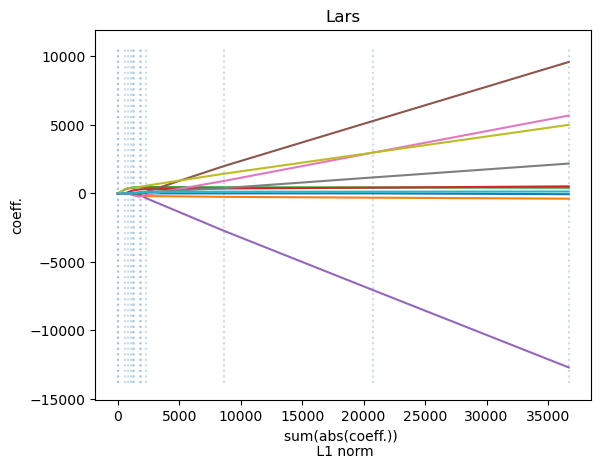

In [ ]:
np.set_printoptions(suppress = True)

dataset_diabetes = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(dataset_diabetes["data"], dataset_diabetes["target"])

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

lars = linear_model.Lars()
lars.fit(x_train, y_train)
yp_test_lars = lars.predict(x_test)
coef_path = lars.coef_path_
path = np.sum(abs(coef_path), axis = 0)

print("Coeff.:", lars.coef_.round(2))
print("MSE:", metrics.mean_squared_error(y_test, yp_test_lars).round(2))
print("(n_features, n_alphas + 1) :", coef_path.shape)

plt.figure()
plt.plot(path, coef_path.T)
ymin, ymax = plt.ylim()
plt.vlines(path, ymin, ymax, linestyle = "dotted", alpha = 0.25)
plt.xlabel("sum(abs(coeff.)) \n L1 norm")
plt.ylabel("coeff.")
plt.title("Lars")

x_train shape: (331, 10) y_train shape: (331,)
x_test shape: (111, 10) y_test shape: (111,)
Coeff. (Linear Regression): [ -84.74 -301.28  621.53  310.36 -979.    707.84  194.68  138.68  844.85
   27.41]
Coeff. (Bayesian Ridge): [ -69.6  -284.    608.71  301.74 -178.25   63.07 -143.72   73.64  517.25
   39.98]
Coeff. (Automatic Relevance Determination): [ -11.12 -271.68  639.08  274.    -36.47   -0.   -215.97    0.    490.88
    0.  ]
MSE (Linear Regression): 3333.46
MSE (Bayesian Ridge): 3240.53
MSE (Automatic Relevance Determination): 3269.16


Text(0, 0.5, 'coeff.')

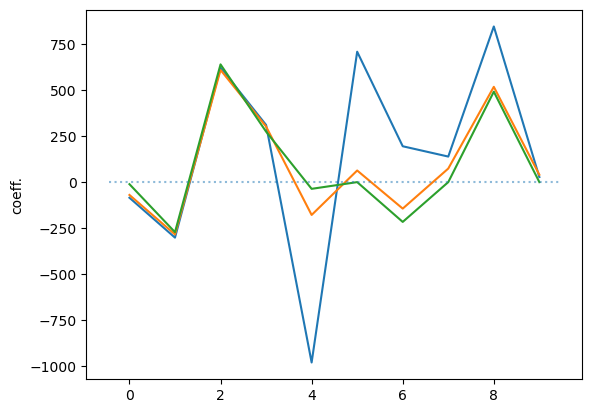

In [ ]:
np.set_printoptions(suppress = True)

dataset_diabetes = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(dataset_diabetes["data"], dataset_diabetes["target"])

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

ols = linear_model.LinearRegression()
ols.fit(x_train, y_train)
yp_test_ols = ols.predict(x_test)

byr = linear_model.BayesianRidge()
byr.fit(x_train, y_train)
yp_test_byr = byr.predict(x_test)

ard = linear_model.ARDRegression()
ard.fit(x_train, y_train)
yp_test_ard = ard.predict(x_test)

print("Coeff. (Linear Regression):", ols.coef_.round(2))
print("Coeff. (Bayesian Ridge):", byr.coef_.round(2))
print("Coeff. (Automatic Relevance Determination):", ard.coef_.round(2))
print("MSE (Linear Regression):", metrics.mean_squared_error(y_test, yp_test_ols).round(2))
print("MSE (Bayesian Ridge):", metrics.mean_squared_error(y_test, yp_test_byr).round(2))
print("MSE (Automatic Relevance Determination):", metrics.mean_squared_error(y_test, yp_test_ard).round(2))

plt.plot(range(len(ols.coef_)), ols.coef_)
plt.plot(range(len(byr.coef_)), byr.coef_)
plt.plot(range(len(ard.coef_)), ard.coef_)
xmin, xmax = plt.xlim()
plt.hlines(0, xmin, xmax, linestyles = "dotted", alpha = 0.5)
plt.ylabel("coeff.")

0.96
0.82


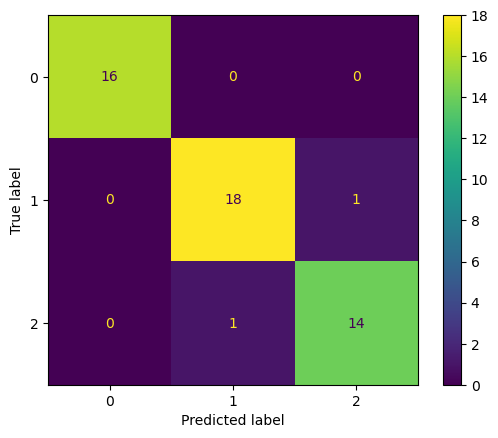

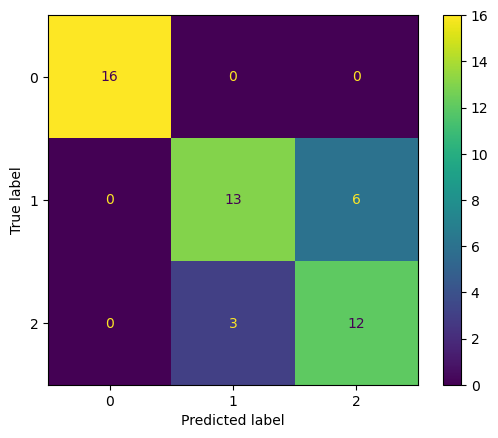

In [ ]:
data = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    test_size = 0.33, shuffle = True, random_state = 0)
logit = linear_model.LogisticRegression(penalty = 'l2', fit_intercept = True, random_state = None,
                                        solver = 'lbfgs', multi_class = 'ovr')
logit.fit(x_train, y_train)
yp_test_logit = logit.predict(x_test)
print(logit.score(x_test, y_test))


ridge_clf = linear_model.RidgeClassifier()
ridge_clf.fit(x_train, y_train)
yp_test_ridge_clf = ridge_clf.predict(x_test)
print(ridge_clf.score(x_test, y_test))


conf_logit = metrics.confusion_matrix(y_test, yp_test_logit)
disp_logit = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_logit, display_labels = logit.classes_)
disp_logit.plot()

conf_ridge_clf = metrics.confusion_matrix(y_test, yp_test_ridge_clf)
disp_ridge_clf = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_ridge_clf, display_labels = ridge_clf.classes_)
disp_ridge_clf.plot()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

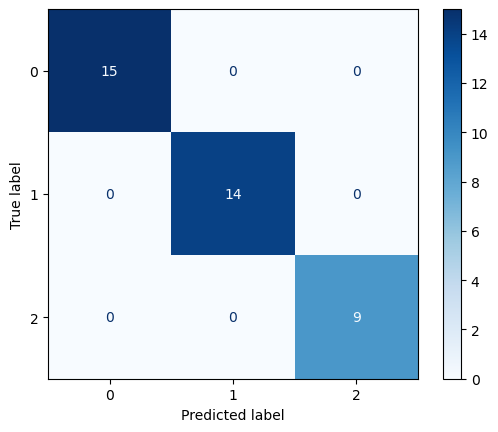

In [ ]:
dataset = datasets.load_iris()
print(dataset.keys())
print(dataset.DESCR)
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target)
max_iter = np.ceil(10**6/x_train.shape[0])
sgd = make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(max_iter = int(max_iter), tol = 1e-3))
sgd.fit(x_train, y_train)
yp_test_sgd = sgd.predict(x_test)
print("SGD classifier's score:", metrics.accuracy_score(y_test, yp_test_sgd))
conf = metrics.confusion_matrix(y_test, yp_test_sgd, labels = sgd.classes_, sample_weight = None, normalize = None)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = sgd.classes_)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
dataset = datasets.make_classification(n_samples = 100, n_features = 6, n_classes = 2)
x_train, x_test, y_train, y_test = train_test_split(dataset[0], dataset[1])
clf = linear_model.PassiveAggressiveClassifier(C = 0.5)
clf.fit(x_train, y_train)
yp_test_passagressive = clf.predict(x_test)
print(metrics.accuracy_score(y_test, yp_test_passagressive))

0.8


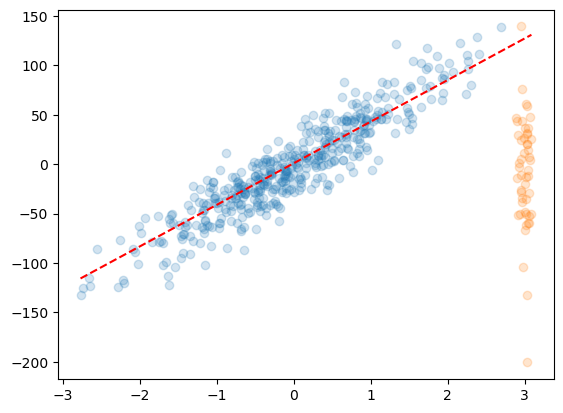

In [ ]:
x, y = datasets.make_regression(n_samples = 500, n_features = 1, noise = 20, random_state = 0)
num_out = 50
x[:num_out] = 3 + 0.05 * np.random.normal(size = (num_out, 1))
y[:num_out] = -3 + 50 * np.random.normal(size = num_out)
_train, x_test, y_train, y_test = train_test_split(dataset[0], dataset[1])

x_outlier = x[:num_out]
y_outlier = y[:num_out]
x_inlier = x[num_out:]
y_inlier = y[num_out:]

x_plot = np.linspace(np.min(x), np.max(x), 10).reshape(-1, 1)
reg = linear_model.RANSACRegressor()
reg.fit(x, y)
y_plot = reg.predict(x_plot)


plt.scatter(x_inlier, y_inlier, alpha = 0.2)
plt.scatter(x_outlier, y_outlier, alpha = 0.2)
plt.plot(x_plot, y_plot, linestyle = '--', c = "r")